## Importing Packages 

In [1]:
import requests
import pandas as pd
import numpy as np
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

## Gather

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#requesting The File From Server And Download It 
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
r = requests.get(url)

with open(file_name, "wb") as file:
    file.write(r.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

In [5]:
twitter_json = pd.read_json ('tweet-json.txt',lines = True)

## Assess

In [6]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
pd.unique(twitter_archive_enhanced.name)


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [9]:
twitter_archive_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Sage         1
Mona         1
O            1
Bradley      1
space        1
Name: name, Length: 957, dtype: int64

In [10]:
list(twitter_archive_enhanced)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [11]:
twitter_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [15]:
twitter_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [16]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [17]:
list(twitter_json)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

#### Quality
##### `twitter_archive_enhanced` table
- Change id to String 
- remove retweeted tweets from this table
- deleting all rows with rating_denominator not equal 10
- Clearing all rows with rating_numerator less than 10
- All rating_numerator bigger than 15 will be 15
- Change timestamp from string to datetime
- Change None and all Invalid names with NaN value and Change All to Lower Case

##### `image_predictions` table
- Change tweet_id to string
- Select breed of dog based on predictions 


##### `twitter_json` table
- Change id To string

#### Tidiness
- Creating dog_stage Col in twitter_archive_enhanced and delete all 4 stages columns
- Creating rating Col in twitter_archive_enhanced instead of rating_denominator and rating_denominator and make it float
- Delete unwanted columns in twitter_archive_enhanced
- Rename image_predictions columns 
- Make a breed Column and drop unnecessary columns
- Drop all columns in twitter_json except id , retweet_count and favorite_count

## Clean

In [18]:
# Creating Clean DataFrames To Modify Them

twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

image_predictions_clean = image_predictions.copy()

twitter_json_clean = twitter_json.copy()



####  `twitter_archive_enhanced`


##### Define
Change All Ids to Strings

##### Code

In [19]:
twitter_archive_enhanced_clean["tweet_id"]= twitter_archive_enhanced_clean["tweet_id"].astype(str) 

##### Test

In [20]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Define
remove retweeted tweets from this table

In [21]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
# We Have 181 retweeted tweets
twitter_archive_enhanced_clean.shape[0] -sum(twitter_archive_enhanced_clean.retweeted_status_id .isnull())

181

##### Code

In [23]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isna()]

##### Test

In [24]:
sum(twitter_archive_enhanced_clean.retweeted_status_id .isnull())

2175

##### Define
deleting rows with rating_denominator not equal 10 

In [25]:
twitter_archive_enhanced_clean.rating_denominator.value_counts()


10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

##### Code

In [26]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[ twitter_archive_enhanced_clean.rating_denominator == 10 ]

##### Test

In [27]:
twitter_archive_enhanced_clean.rating_denominator.value_counts()


10    2153
Name: rating_denominator, dtype: int64

##### Define

Clearing all rows with rating_numerator less than 10

In [28]:
twitter_archive_enhanced_clean.rating_numerator.unique() [twitter_archive_enhanced_clean.rating_numerator.unique() < 10]

array([5, 6, 0, 7, 3, 8, 9, 4, 1, 2], dtype=int64)

##### Code

In [29]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[ twitter_archive_enhanced_clean.rating_numerator >= 10 ]

##### Test

In [30]:
twitter_archive_enhanced_clean.rating_numerator.unique() [twitter_archive_enhanced_clean.rating_numerator.unique() < 10]

array([], dtype=int64)

In [31]:
twitter_archive_enhanced_clean.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
14       43
420       2
1776      1
666       1
182       1
75        1
27        1
26        1
17        1
15        1
Name: rating_numerator, dtype: int64

##### Define
All rating_numerator bigger than 15 will be 15

##### Code

In [32]:
twitter_archive_enhanced_clean.rating_numerator =twitter_archive_enhanced_clean['rating_numerator'].apply(
    lambda x: 15 if x > 15 else x
)

##### Test

In [33]:
twitter_archive_enhanced_clean.rating_numerator.describe()

count    1727.000000
mean       11.486972
std         1.156236
min        10.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

##### Define
change timestamp from string to datetime

##### Code


In [34]:
twitter_archive_enhanced_clean['timestamp']= pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])


##### Test

In [35]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1727 non-null   object             
 1   in_reply_to_status_id       62 non-null     float64            
 2   in_reply_to_user_id         62 non-null     float64            
 3   timestamp                   1727 non-null   datetime64[ns, UTC]
 4   source                      1727 non-null   object             
 5   text                        1727 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1682 non-null   object             
 10  rating_numerator            1727 non-null   int64           

##### Define
Change None and A and the with NaN value and Change All to Lower Case

In [36]:
twitter_archive_enhanced_clean.name.value_counts()

None        527
a            29
Charlie      11
Lucy         10
Cooper        9
           ... 
Skittles      1
Joey          1
Harper        1
Kody          1
space         1
Name: name, Length: 814, dtype: int64

##### Code 

In [37]:
twitter_archive_enhanced_clean.name =twitter_archive_enhanced_clean['name'].apply(
    lambda x: x.lower()
)

twitter_archive_enhanced_clean.name =twitter_archive_enhanced_clean['name'].apply(
    lambda x: np.nan if x == 'none' or x == 'a' or x == 'the' else x
)


##### Test 

In [38]:
twitter_archive_enhanced_clean.name.value_counts()

charlie    11
lucy       10
oliver      9
cooper      9
tucker      8
           ..
eugene      1
franq       1
jarod       1
pip         1
space       1
Name: name, Length: 811, dtype: int64

##### Define
Creating dog_stage Col in twitter_archive_enhanced and delete all 4 stages columns

In [39]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1727 non-null   object             
 1   in_reply_to_status_id       62 non-null     float64            
 2   in_reply_to_user_id         62 non-null     float64            
 3   timestamp                   1727 non-null   datetime64[ns, UTC]
 4   source                      1727 non-null   object             
 5   text                        1727 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1682 non-null   object             
 10  rating_numerator            1727 non-null   int64           

##### Code

In [40]:
def clean_methode(stages_list):
    stages_clean_set = set(stages_list)
    if "None " in stages_clean_set:
        stages_clean_set.remove('None ')
    if "None" in stages_clean_set:
        stages_clean_set.remove('None')
        
    if len(stages_clean_set) == 0:
        return np.nan
    
    string_stages ='' 
    for item in stages_clean_set :
        string_stages += item + " "
    return string_stages 

In [41]:
twitter_archive_enhanced_clean['dog_stage'] = (
    
    twitter_archive_enhanced_clean['doggo']+','+
    twitter_archive_enhanced_clean['floofer']+','+
    twitter_archive_enhanced_clean['pupper']+','+
    twitter_archive_enhanced_clean['puppo']
    
)

twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['dog_stage'].str.split(',')


twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['dog_stage'].apply(
    clean_methode
)

##### Test

In [42]:
twitter_archive_enhanced_clean['dog_stage'].value_counts()

pupper            185
doggo              72
puppo              23
floofer             9
pupper doggo        9
floofer doggo       1
puppo doggo         1
Name: dog_stage, dtype: int64

In [43]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,None,None,None,None,NaN


##### Define 
drop the four stages columns 

In [44]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage'],
      dtype='object')

##### Code 

In [45]:
twitter_archive_enhanced_clean.drop(columns=['doggo', 'floofer' , 'pupper' , 'puppo'],inplace = True)

##### Test

In [46]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

##### Define
Creating rating Col in twitter_archive_enhanced instead of rating_denominator and rating_denominator and make it float

In [47]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1727 non-null   object             
 1   in_reply_to_status_id       62 non-null     float64            
 2   in_reply_to_user_id         62 non-null     float64            
 3   timestamp                   1727 non-null   datetime64[ns, UTC]
 4   source                      1727 non-null   object             
 5   text                        1727 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1682 non-null   object             
 10  rating_numerator            1727 non-null   int64           

##### Code

In [48]:
twitter_archive_enhanced_clean['rating'] = (
    twitter_archive_enhanced_clean['rating_numerator'] / twitter_archive_enhanced_clean['rating_denominator']
).astype(float)

##### Test

In [49]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 2350
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1727 non-null   object             
 1   in_reply_to_status_id       62 non-null     float64            
 2   in_reply_to_user_id         62 non-null     float64            
 3   timestamp                   1727 non-null   datetime64[ns, UTC]
 4   source                      1727 non-null   object             
 5   text                        1727 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1682 non-null   object             
 10  rating_numerator            1727 non-null   int64           

##### Define
Delete unwanted columns in twitter_archive_enhanced

In [50]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'rating'],
      dtype='object')

##### Code

In [51]:
twitter_archive_enhanced_clean.drop(columns=[
    'in_reply_to_status_id', 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id'
    ,'retweeted_status_timestamp','rating_numerator','rating_denominator'
],inplace = True )

##### Test

In [52]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,NaN,1.2


####  `image_predictions`


##### Define 
Change tweet_id to string

In [53]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Code

In [54]:
image_predictions_clean["tweet_id"]= image_predictions_clean["tweet_id"].astype(str) 

##### Test 

In [55]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define 
Select breed of dog based on predictions

In [56]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [57]:
sum(image_predictions_clean.p3_conf.isnull())

0

##### Code

In [58]:
#this function return the dog name with the hightest prediction
def dog_name(row):
    predictions = {'p1': {'name': row['p1'], 'prediction': row['p1_conf'], 'is_dog': row['p1_dog']},
                   'p2': {'name': row['p2'], 'prediction': row['p2_conf'], 'is_dog': row['p2_dog']},
                   'p3': {'name': row['p3'], 'prediction': row['p3_conf'], 'is_dog': row['p3_dog']}
                 }
    
    valid_predictions = {}
    for prediction in predictions:
        if predictions[prediction]['is_dog'] == True :
            valid_predictions[prediction]= predictions[prediction]
    
    if len(valid_predictions) == 0 :
        return np.nan
    
    dog_name = ' '
    max_prediction = -1 
    
    for prediction in valid_predictions :
        if valid_predictions[prediction]['prediction'] > max_prediction :
            dog_name = valid_predictions[prediction]['name']
            max_prediction = valid_predictions[prediction]['prediction']
    
    return dog_name 


In [59]:
image_predictions_clean['breed'] = image_predictions_clean.apply(dog_name,axis = 1)

##### Test 

In [60]:
image_predictions_clean.breed

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       NaN
Name: breed, Length: 2075, dtype: object

##### Define
drop unnecessary columns in image_predictions

In [61]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed'],
      dtype='object')

##### Code

In [62]:
image_predictions_clean.drop(columns=[
    'img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'
],inplace = True )

##### Test

In [63]:
image_predictions_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


####  `twitter_json`


##### Define 
Change id column name to merge it with other dataframes


In [64]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

##### Code 

In [65]:
twitter_json_clean.rename(columns={"id": "tweet_id"},inplace = True);

##### Test

In [66]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

##### Define 
Change id from int To String 


In [67]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

##### Code

In [68]:
twitter_json_clean.tweet_id = twitter_json_clean.tweet_id.astype(str)

##### Test

In [69]:
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

##### Define 
Drop all columns in twitter_json except id , retweet_count and favorite_count

In [70]:
twitter_json_clean.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

##### Code

In [71]:
twitter_json_clean.drop(columns=[
    'created_at','id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'
],inplace = True )

##### Test

In [72]:
twitter_json_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Clean DataFrames 


In [73]:
twitter_archive_enhanced_clean

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,NaN,1.2
...,...,...,...,...,...,...,...,...
2339,666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,NaN,NaN,1.1
2343,666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,NaN,NaN,1.0
2345,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,NaN,NaN,1.0
2348,666055525042405380,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,NaN,NaN,1.0


In [74]:
image_predictions_clean

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


In [75]:
twitter_json_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


###  Merging These Clean DataFrames 

In [76]:
Dfs = [twitter_archive_enhanced_clean, image_predictions_clean, twitter_json_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), Dfs)

In [77]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating,jpg_url,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,666102155909144576,2015-11-16 03:55:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,NaN,NaN,1.1,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,English_setter,16,81
1562,666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,NaN,NaN,1.0,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,174,335
1563,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,NaN,NaN,1.0,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,232,496
1564,666055525042405380,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,NaN,NaN,1.0,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,261,448


In [78]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Data analysis

### Insights 


#### Most Common Dog Name Is Charlie

In [79]:
twitter_archive_master.name.value_counts()

charlie    11
lucy       10
oliver      9
cooper      9
tucker      8
           ..
jarod       1
pip         1
lilli       1
brutus      1
space       1
Name: name, Length: 789, dtype: int64

#### The Most Retweeted Posts Was At 2016 

In [80]:
twitter_archive_master.groupby(pd.Grouper(key='timestamp',freq='Y')).sum().sort_values(by=['retweet_count'],ascending = False)


,rating,retweet_count,favorite_count
timestamp,,,
2016-12-31 00:00:00+00:00,925.0,2424277,6821965
2017-12-31 00:00:00+00:00,440.8,2117549,8459921
2015-12-31 00:00:00+00:00,424.6,527500,1215766


#### Most Favorite Breed To People Is Golden Retriever

In [81]:
twitter_archive_master.groupby('breed').sum().sort_values(by=['favorite_count'],ascending = False)

,rating,retweet_count,favorite_count
breed,,,
golden_retriever,170.4,556380,1844303
Labrador_retriever,110.0,385736,1218982
Pembroke,104.6,286458,1020118
Chihuahua,78.9,222213,685286
Samoyed,48.4,201627,578270
...,...,...,...
Brabancon_griffon,3.0,863,2655
Tibetan_terrier,1.2,776,2411
groenendael,2.0,553,2313


#### The OverAll Average Rate For All Stages is 1.19


In [82]:
twitter_archive_master.groupby('dog_stage')['rating'].mean()

dog_stage
doggo             1.208333
floofer           1.200000
floofer doggo     1.100000
pupper            1.129878
pupper doggo      1.175000
puppo             1.214286
puppo doggo       1.300000
Name: rating, dtype: float64

In [83]:
twitter_archive_master.groupby('dog_stage')['rating'].mean().mean()

1.1896424423427905

### visualization 

##### Best Hour To Tweet Based On Number Of Retweets

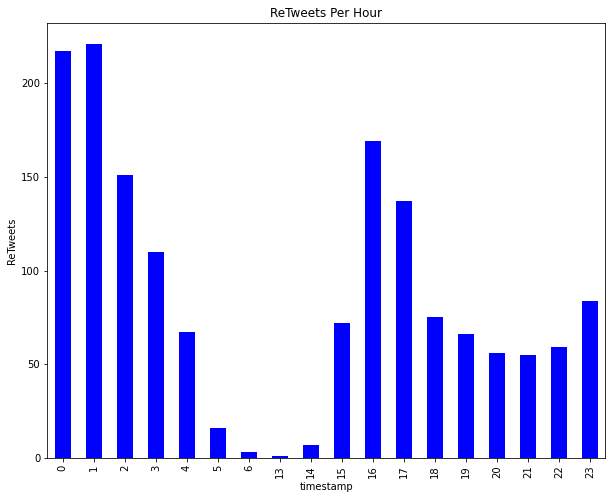

In [84]:
plt.title('ReTweets Per Hour')
plt.xlabel('Hour')
plt.ylabel('ReTweets')
twitter_archive_master.groupby(twitter_archive_master.timestamp.dt.hour).count()['retweet_count'].plot(
    kind = 'bar',color = ['blue'] ,figsize =(10, 8)
);
